In [2]:
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
def date_select(df, start, end):
    mask = (df.index >= pd.to_datetime(start)) & (df.index < pd.to_datetime(end))
    return(df[mask])

In [84]:
def calc_ctl(df):
    df['WorkoutDay'] = pd.to_datetime(df['WorkoutDay'])
    df = df.groupby('WorkoutDay').sum()
    df = df[['TSS']].copy()
    start_date = df.index.min()
    end_date = df.index.max()
    all_days = pd.date_range(start_date, end_date)
    df = df.reindex(all_days, fill_value=0)
    df['CTL'] = 0
    CTL_list = list(df['CTL'])
    TSS_list = list(df['TSS'])
    for idx,(tss,ctl) in enumerate(zip(TSS_list,CTL_list)):
        if idx==0:
            CTL_list[0] = int(tss/42)
            continue
        ctl_yesterday = CTL_list[idx-1]
        CTL_list[idx] = (ctl_yesterday + ((tss - ctl_yesterday)/42))
    df['CTL'] = CTL_list
    return(df)

In [85]:
def compare_years(df,year_list, month_list):
    year_list.sort()
    month_list.sort()
    begin_list = []
    end_list = []
    for year in year_list:
        begin_list.append('-'.join([str(year),str(month_list[0]),'01']))
        end_list.append('-'.join([str(year), str(month_list[-1]+1),'01']))
    select_list = []
    selected_dates = []
    for begin,end in zip(begin_list,end_list):
        yoy_dates = pd.date_range(start=begin,end=end)
        selected = date_select(df,begin,end)
        selected = selected.reindex(yoy_dates)
        selected_dates = ['-'.join([str(date.month), str(date.day)]) for date in yoy_dates]
        selected.index = selected_dates
        select_list.append(selected)
    # Assumes all same dates
    plot_df = pd.DataFrame(index=selected_dates)
    for year,selected in zip(year_list,select_list):
        plot_df[str(year)] = selected['CTL'].ffill()
        
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    plot_df.plot(ax=ax,fontsize=20)
    ax.legend(fontsize=20)
    ax.set_title('Chronic Training Load, year over year',fontsize=20)
    ax.set_ylabel('CTL',fontsize=20)
    ax.set_xlabel('Month-Day',fontsize=20)
    ax.grid(visible=True, which='both')

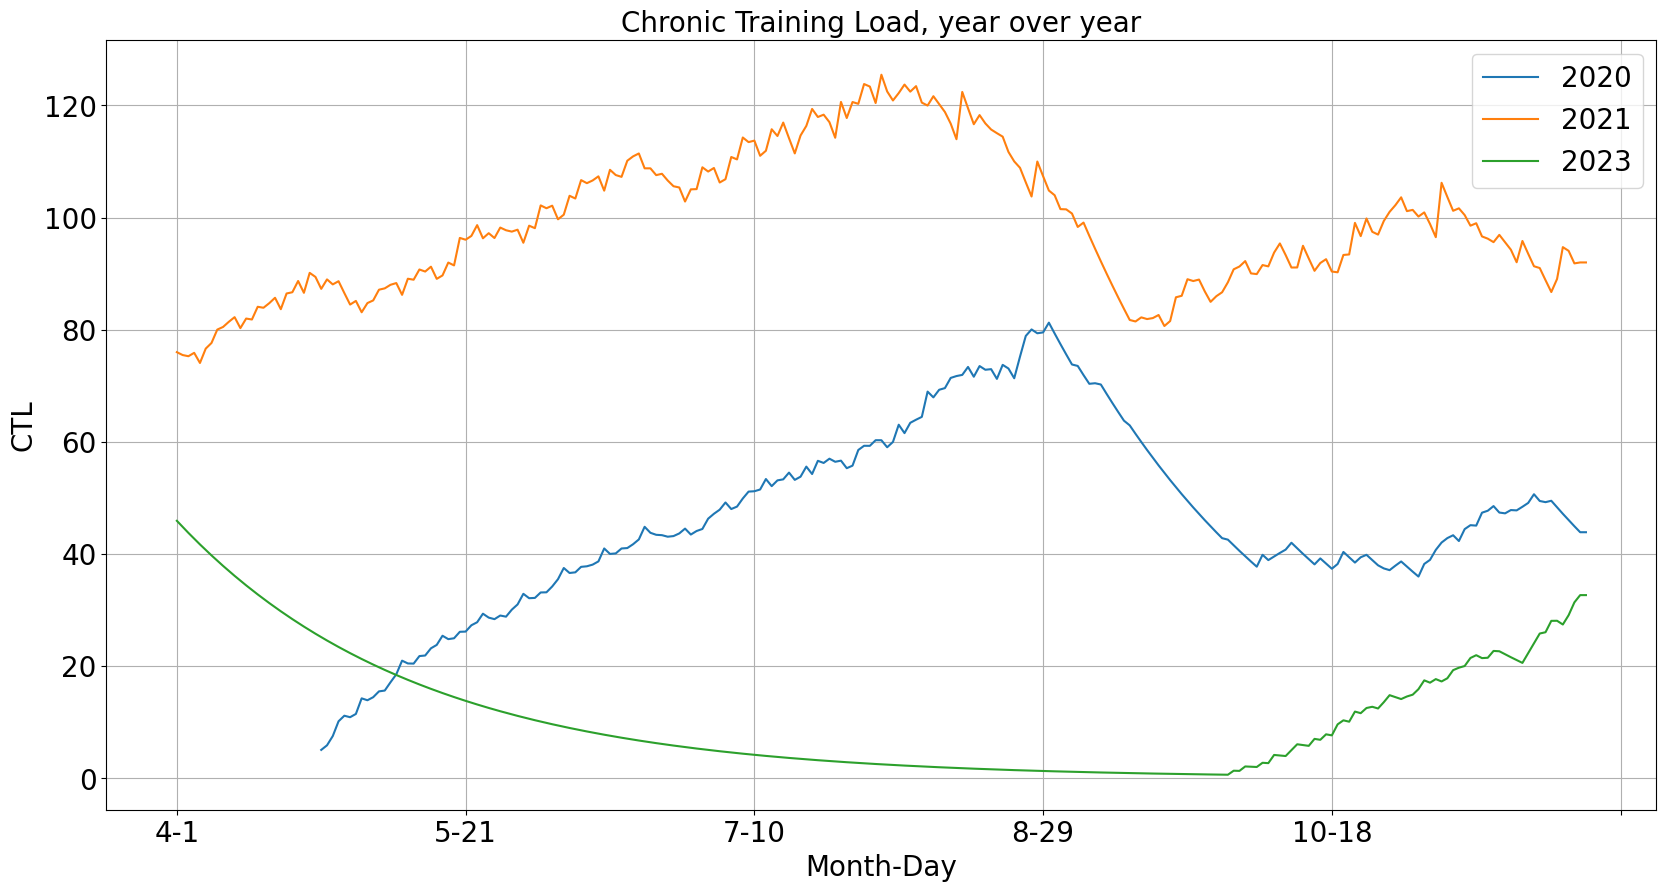

In [99]:
df=pd.read_csv('workouts.csv')
df = calc_ctl(df)
compare_years(df,year_list=[2020,2021,2023],month_list=[4,5,6,7,8,9,10,11])